In [11]:
#installing the kaggle library
!pip install kaggle


In [12]:
#configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

... resuming from 5242880 bytes (846333809 bytes left) ...
 99% 801M/812M [00:08<00:00, 90.8MB/s]
100% 812M/812M [00:08<00:00, 95.3MB/s]


In [14]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [15]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [16]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [17]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/test1.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [18]:
import os
#counting the number of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("number of files=", file_count)

number of files= 25000


printing the names of images

In [19]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.3878.jpg', 'dog.8335.jpg', 'cat.6721.jpg', 'dog.7516.jpg', 'dog.9232.jpg', 'dog.6926.jpg', 'cat.11749.jpg', 'cat.361.jpg', 'cat.12210.jpg', 'dog.203.jpg', 'dog.5973.jpg', 'cat.577.jpg', 'dog.7999.jpg', 'dog.10496.jpg', 'cat.6550.jpg', 'cat.774.jpg', 'cat.10815.jpg', 'dog.6753.jpg', 'dog.8571.jpg', 'dog.1911.jpg', 'cat.11728.jpg', 'cat.5319.jpg', 'cat.3151.jpg', 'dog.11797.jpg', 'cat.5478.jpg', 'dog.11432.jpg', 'cat.1531.jpg', 'dog.10120.jpg', 'dog.9897.jpg', 'dog.5228.jpg', 'dog.12316.jpg', 'cat.4290.jpg', 'cat.11661.jpg', 'cat.9940.jpg', 'dog.1413.jpg', 'dog.9876.jpg', 'dog.6016.jpg', 'cat.2495.jpg', 'cat.8498.jpg', 'dog.10318.jpg', 'dog.6254.jpg', 'dog.10658.jpg', 'dog.1535.jpg', 'cat.9874.jpg', 'dog.920.jpg', 'cat.9147.jpg', 'dog.7660.jpg', 'cat.12004.jpg', 'cat.9336.jpg', 'dog.2303.jpg', 'cat.7150.jpg', 'dog.8943.jpg', 'cat.2615.jpg', 'dog.1669.jpg', 'dog.9042.jpg', 'cat.855.jpg', 'dog.9825.jpg', 'cat.6056.jpg', 'cat.12022.jpg', 'dog.10742.jpg', 'dog.9527.jpg', 'cat.2655.jpg'

import the dependencies

In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying images of dogs

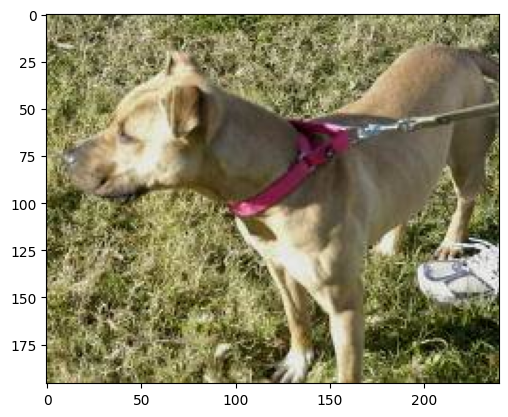

In [21]:
#display dog image
img= mpimg.imread('/content/train/dog.8335.jpg')
imgplt=plt.imshow(img)
plt.show()

In [24]:
for i in range(len(file_names)):
  name=file_names[i]
  print(name[0:3])

Streaming output truncated to the last 5000 lines.
cat
dog
dog
cat
dog
dog
dog
cat
dog
cat
cat
cat
cat
dog
dog
cat
dog
cat
cat
dog
cat
dog
dog
cat
dog
dog
dog
dog
cat
cat
dog
cat
cat
cat
dog
dog
cat
dog
cat
cat
cat
dog
dog
cat
dog
dog
dog
cat
dog
cat
cat
cat
cat
dog
dog
dog
dog
dog
dog
cat
dog
dog
dog
cat
dog
dog
cat
cat
cat
dog
cat
dog
cat
cat
dog
cat
dog
cat
cat
dog
cat
cat
dog
dog
cat
dog
cat
dog
cat
dog
cat
dog
dog
dog
cat
cat
cat
dog
cat
dog
cat
dog
dog
cat
cat
dog
cat
dog
dog
cat
dog
cat
dog
cat
cat
dog
dog
cat
cat
cat
cat
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
cat
cat
cat
dog
cat
cat
cat
cat
cat
dog
cat
dog
cat
dog
dog
cat
cat
cat
dog
dog
dog
cat
dog
dog
cat
cat
cat
dog
dog
cat
cat
dog
dog
cat
cat
cat
dog
dog
cat
cat
dog
cat
cat
cat
dog
dog
dog
cat
cat
dog
cat
dog
dog
cat
cat
dog
cat
dog
dog
cat
dog
cat
dog
dog
cat
cat
cat
cat
dog
cat
dog
dog
dog
cat
dog
cat
dog
dog
dog
cat
cat
cat
cat
dog
dog
dog
cat
cat
cat
dog
dog
cat
cat
dog
dog
cat
cat
dog
cat
d

In [28]:
dog_cnt=0
cat_cnt=0

for img_file in file_names:
  name=img_file[0:3]
  if name=='dog':
    dog_cnt+=1
  else:
    cat_cnt+=1

print("number of dog images are=", dog_cnt)
print("number of cat images are=", cat_cnt)


number of dog images are= 12500
number of cat images are= 12500


resizing all the images

In [29]:
# creating a directory to store resized images
os.mkdir('/content/image_resized')

In [34]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'

In [35]:
for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img= Image.open(img_path)
  img= img.resize((224,224))
  img=img.convert('RGB')

  newImgPath=resized_folder+filename
  img.save(newImgPath)

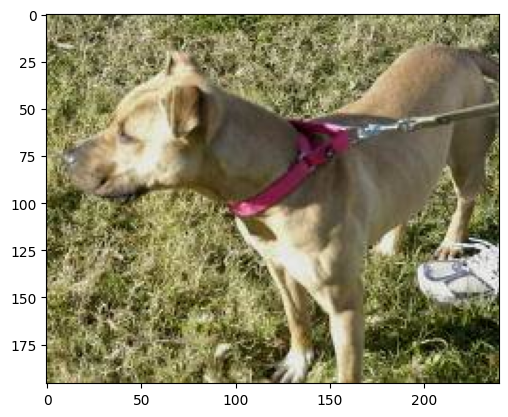

In [36]:
#displaying resized dog image

img=mpimg.imread('/content/train/dog.8335.jpg')
imgplt=plt.imshow(img)
plt.show()

creating labels for resized images of dogs and cats

Cat -> 0
Dog ->1


In [38]:
#creating a for loop to assign labels
file_names=os.listdir('/content/image_resized/')
labels=[]
for i in range(2000):
  file_name = file_names[i]
  label=file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [39]:
print(labels[0:3])

[0, 1, 0]


In [40]:
#counting the images of dogs and cats out of 2000 images

In [41]:
values,counts=np.unique(labels,return_counts=True)
print(counts)

[ 985 1015]


Converting all the resized images to numpy arrays

In [42]:
import cv2
import glob

In [44]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [45]:
print(dog_cat_images)

[[[[108 104 115]
   [108 104 115]
   [108 104 115]
   ...
   [ 78  81  86]
   [ 78  81  86]
   [ 78  81  86]]

  [[109 105 116]
   [109 105 116]
   [109 105 116]
   ...
   [ 78  81  86]
   [ 78  81  86]
   [ 78  81  86]]

  [[111 107 118]
   [111 107 118]
   [111 107 118]
   ...
   [ 78  81  86]
   [ 78  81  86]
   [ 78  81  86]]

  ...

  [[105  95 112]
   [ 96  86 102]
   [ 91  81  97]
   ...
   [ 75  78  83]
   [ 76  79  84]
   [ 76  79  84]]

  [[104  93 113]
   [ 99  88 108]
   [101  91 107]
   ...
   [ 75  78  83]
   [ 75  78  83]
   [ 75  78  83]]

  [[103  91 113]
   [ 94  83 103]
   [ 91  81  98]
   ...
   [ 74  77  82]
   [ 75  78  83]
   [ 75  78  83]]]


 [[[ 84 131 129]
   [147 194 192]
   [106 150 149]
   ...
   [163 213 211]
   [110 160 158]
   [ 96 149 146]]

  [[119 166 164]
   [138 185 183]
   [ 78 122 121]
   ...
   [117 166 164]
   [145 195 193]
   [102 155 152]]

  [[138 185 183]
   [127 174 172]
   [ 63 107 106]
   ...
   [ 91 140 138]
   [108 158 156]
   [ 67 117

In [46]:
type(dog_cat_images)

numpy.ndarray

In [47]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [48]:
x= dog_cat_images
y=np.asarray(labels)

Train test split


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [75]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [76]:
x_train_scaled =x_train/255
x_test_scaled=x_test/255

Building the neural network

In [77]:
import tensorflow as tf
import tensorflow_hub as hub


In [78]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [79]:
num_of_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [80]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [81]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.1853 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0723 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0578 - acc: 0.9781
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0438 - acc: 0.9856
Epoch 5/5
50/50 [==============================] - 60s 1s/step - loss: 0.0332 - acc: 0.9894


In [82]:
score,ac = model.evaluate(x_test_scaled, y_test)
print("test loss=",score)
print("test accuracy=",ac)


13/13 [==============================] - 16s 1s/step - loss: 0.0490 - acc: 0.9800
test loss= 0.048999201506376266
test accuracy= 0.9800000190734863


building a predictive system

path of the image to be predicted:/content/dog2.jpeg


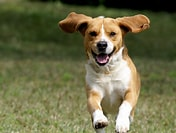

1/1 [==============================] - 0s 53ms/step
its a dog


In [85]:
input_image_path=input("path of the image to be predicted:")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image, (224,224))
input_image_scaled=input_image_resize/255

image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
  print("its a cat")
else:
  print("its a dog")
